# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.7 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [ ]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. Training Our Own Agent

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque
from ddpg_agent import Agent
from unityagents import UnityEnvironment
import time
import torch
import numpy as np
import random

In [6]:
def ddpg(num_episodes=10000, max_t=1000):
    critic_weights_name='critic.pth'
    actor_weights_name='actor.pth'
    best_score = -np.inf
    scores_window = deque(maxlen=100) 
    maximum_scores = list() 
    moving_averages = list()     
    for i_episode in range(1, num_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name] 
        states = env_info.vector_observations 
        scores = np.zeros(num_agents) 
        agent.reset()
        start_time = time.time()
        for t in range(max_t):
            actions = agent.act(states, add_noise=True) 
            env_info = env.step(actions)[brain_name]  
            next_states = env_info.vector_observations
            rewards = env_info.rewards 
            dones = env_info.local_done             
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
            states = next_states
            scores += rewards
            if np.any(dones):
                break
        maximum_scores.append(np.max(scores)) 
        scores_window.append(maximum_scores[-1]) 
        moving_averages.append(np.mean(scores_window))         
        if i_episode % 10 == 0:
            print("\rEpisode {} \tMoving Averages: {:.3f}"\
                  .format(i_episode, moving_averages[-1]))
        if moving_averages[-1] >= 0.5:
            print("\nIt took {:d} episodes to solve the environment.\t with Average score: {:.3f}"\
                 .format(i_episode, moving_averages[-1]))
            torch.save(agent.actor_local.state_dict(), actor_weights_name)
            torch.save(agent.critic_local.state_dict(), critic_weights_name)
            break            
    return maximum_scores, moving_averages

In [7]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=10)
scores, avgs = ddpg()

Episode 10 	Moving Averages: 0.000
Episode 20 	Moving Averages: 0.000
Episode 30 	Moving Averages: 0.003
Episode 40 	Moving Averages: 0.003
Episode 50 	Moving Averages: 0.002
Episode 60 	Moving Averages: 0.005
Episode 70 	Moving Averages: 0.018
Episode 80 	Moving Averages: 0.032
Episode 90 	Moving Averages: 0.034
Episode 100 	Moving Averages: 0.038
Episode 110 	Moving Averages: 0.047
Episode 120 	Moving Averages: 0.050
Episode 130 	Moving Averages: 0.058
Episode 140 	Moving Averages: 0.074
Episode 150 	Moving Averages: 0.088
Episode 160 	Moving Averages: 0.097
Episode 170 	Moving Averages: 0.092
Episode 180 	Moving Averages: 0.091
Episode 190 	Moving Averages: 0.106
Episode 200 	Moving Averages: 0.117
Episode 210 	Moving Averages: 0.123
Episode 220 	Moving Averages: 0.157
Episode 230 	Moving Averages: 0.181
Episode 240 	Moving Averages: 0.195
Episode 250 	Moving Averages: 0.197
Episode 260 	Moving Averages: 0.226
Episode 270 	Moving Averages: 0.266
Episode 280 	Moving Averages: 0.283
E

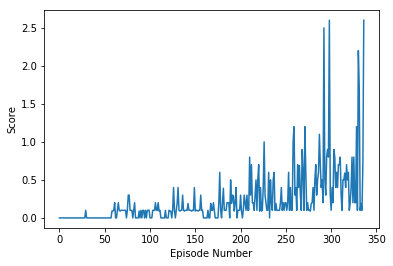

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode Number')
plt.show()